# Нейронная сеть Хопфилда

Импортируем инструменты

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import mnist 
from src import HopfieldNetwork

Создадим обучающую выборку эталонных объектов

In [2]:
np.random.seed(42)
sample = np.array(np.sign(np.random.random(size=(3, 8)) - 0.5), dtype=np.int32)

print(sample)

[[-1  1  1  1 -1 -1 -1  1]
 [ 1  1 -1  1  1 -1 -1 -1]
 [-1  1 -1 -1  1 -1 -1 -1]]


Обучим сеть Хопфилда по указанной выборке

In [3]:
hn = HopfieldNetwork(max_iter=30).fit(sample)

Посмотрим на матрицу весов

In [4]:
print(hn.weights.round(decimals=3))

[[ 0. -1. -1.  1.  1.  1.  1. -1.]
 [-1.  0. -1.  1.  1. -3. -3. -1.]
 [-1. -1.  0.  1. -3.  1.  1.  3.]
 [ 1.  1.  1.  0. -1. -1. -1.  1.]
 [ 1.  1. -3. -1.  0. -1. -1. -3.]
 [ 1. -3.  1. -1. -1.  0.  3.  1.]
 [ 1. -3.  1. -1. -1.  3.  0.  1.]
 [-1. -1.  3.  1. -3.  1.  1.  0.]]


Проверим, что предсказания для эталонных объектов – сами объекты

In [5]:
np.all(hn.predict(sample) == sample, axis=1)

array([ True,  True,  True])

Возмьмём какую нибудь другую выборку и выполним предсказания для неё

In [6]:
np.random.seed(45)
test = np.array(np.sign(np.random.random(size=(3, 8)) - 0.5), dtype=np.int32)

print(sample, test, test == sample, sep="\n" * 2)

[[-1  1  1  1 -1 -1 -1  1]
 [ 1  1 -1  1  1 -1 -1 -1]
 [-1  1 -1 -1  1 -1 -1 -1]]

[[ 1  1 -1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1 -1  1 -1]
 [ 1  1 -1 -1  1 -1 -1 -1]]

[[False  True False False  True  True  True False]
 [False  True False  True  True  True False  True]
 [False  True  True  True  True  True  True  True]]


In [7]:
pred = hn.predict(np.array([[1, 1, 1, 1, 1, 1, 1, 1]]))

print(pred)

[[ 1 -1  1  1 -1  1  1  1]]


In [8]:
np.sign(hn.weights.dot([1, -1,  1,  1, -1,  1,  1,  1]))

array([ 1., -1.,  1.,  1., -1.,  1.,  1.,  1.])

Проверим, что результатом предсказания оказались эталонные объекты

In [9]:
all(instance in sample for instance in pred)

True

Импортируем датасет изображений

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

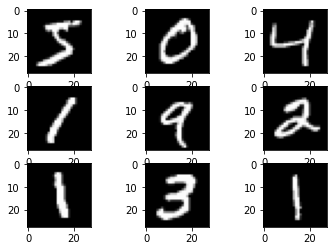

In [11]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Составляем эталонную выборку из 10 изображений каждой цифры. Изображения приводим в формат векторов размерности $784$ из $1$ и $-1$. Для простоты будем считать сигнал сильным ($1$), если его яркость больше среднего. 

In [12]:
full_sample = np.array(np.sign(X_train.reshape(X_train.shape[0], 784) - X_train.mean()), dtype=np.int32)
test = np.array(np.sign(X_test.reshape(X_test.shape[0], 784) - X_train.mean()), dtype=np.int32)

In [13]:
sample = []
n_instances = 10

for number in range(10):
    sample += list(full_sample[y_train == number][:n_instances])
    
sample = np.array(sample, dtype=np.int32)
labels = np.array([np.ones(n_instances) * i for i in range(10)]).reshape(100)
sample.shape, labels.shape

((100, 784), (100,))

Теперь обучаем сеть Хопфилда

In [14]:
hn = HopfieldNetwork(max_iter=1024).fit(sample)

In [15]:
hn.weights.shape

(784, 784)

Делаем предсказания для тестовой выборки (десяти каких-нибудь элементов)

In [16]:
pred = hn.predict(test[20:30])

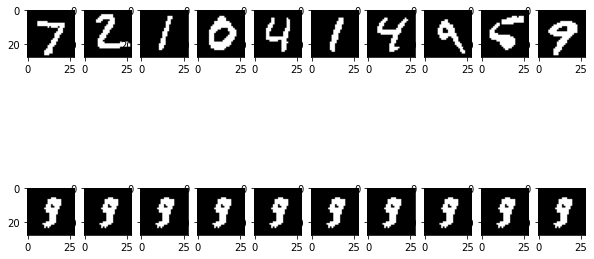

In [17]:
fig, ax = plt.subplots(2, 10, figsize=(10, 6))

for i in range(10):  
    ax[0, i].imshow(test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax[1, i].imshow(pred[i].reshape(28, 28), cmap=plt.get_cmap('gray'))

plt.show()

In [18]:
sample

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])